In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
from dataclasses import dataclass

In [2]:
# Collect data
freqs = [50, 100, 500, 1000]
node_cnts = [1, 2, 3, 4]
int_arrs = [[None for _ in node_cnts] for _ in freqs]
for (i, f) in enumerate(freqs):
  for (j, c) in enumerate(node_cnts):
    file_name = f'./logs/udp_filtered/{c}-{f}/1.csv'
    data = pd.read_csv(file_name)
    int_arrs[i][j] = data['delay'].to_numpy()

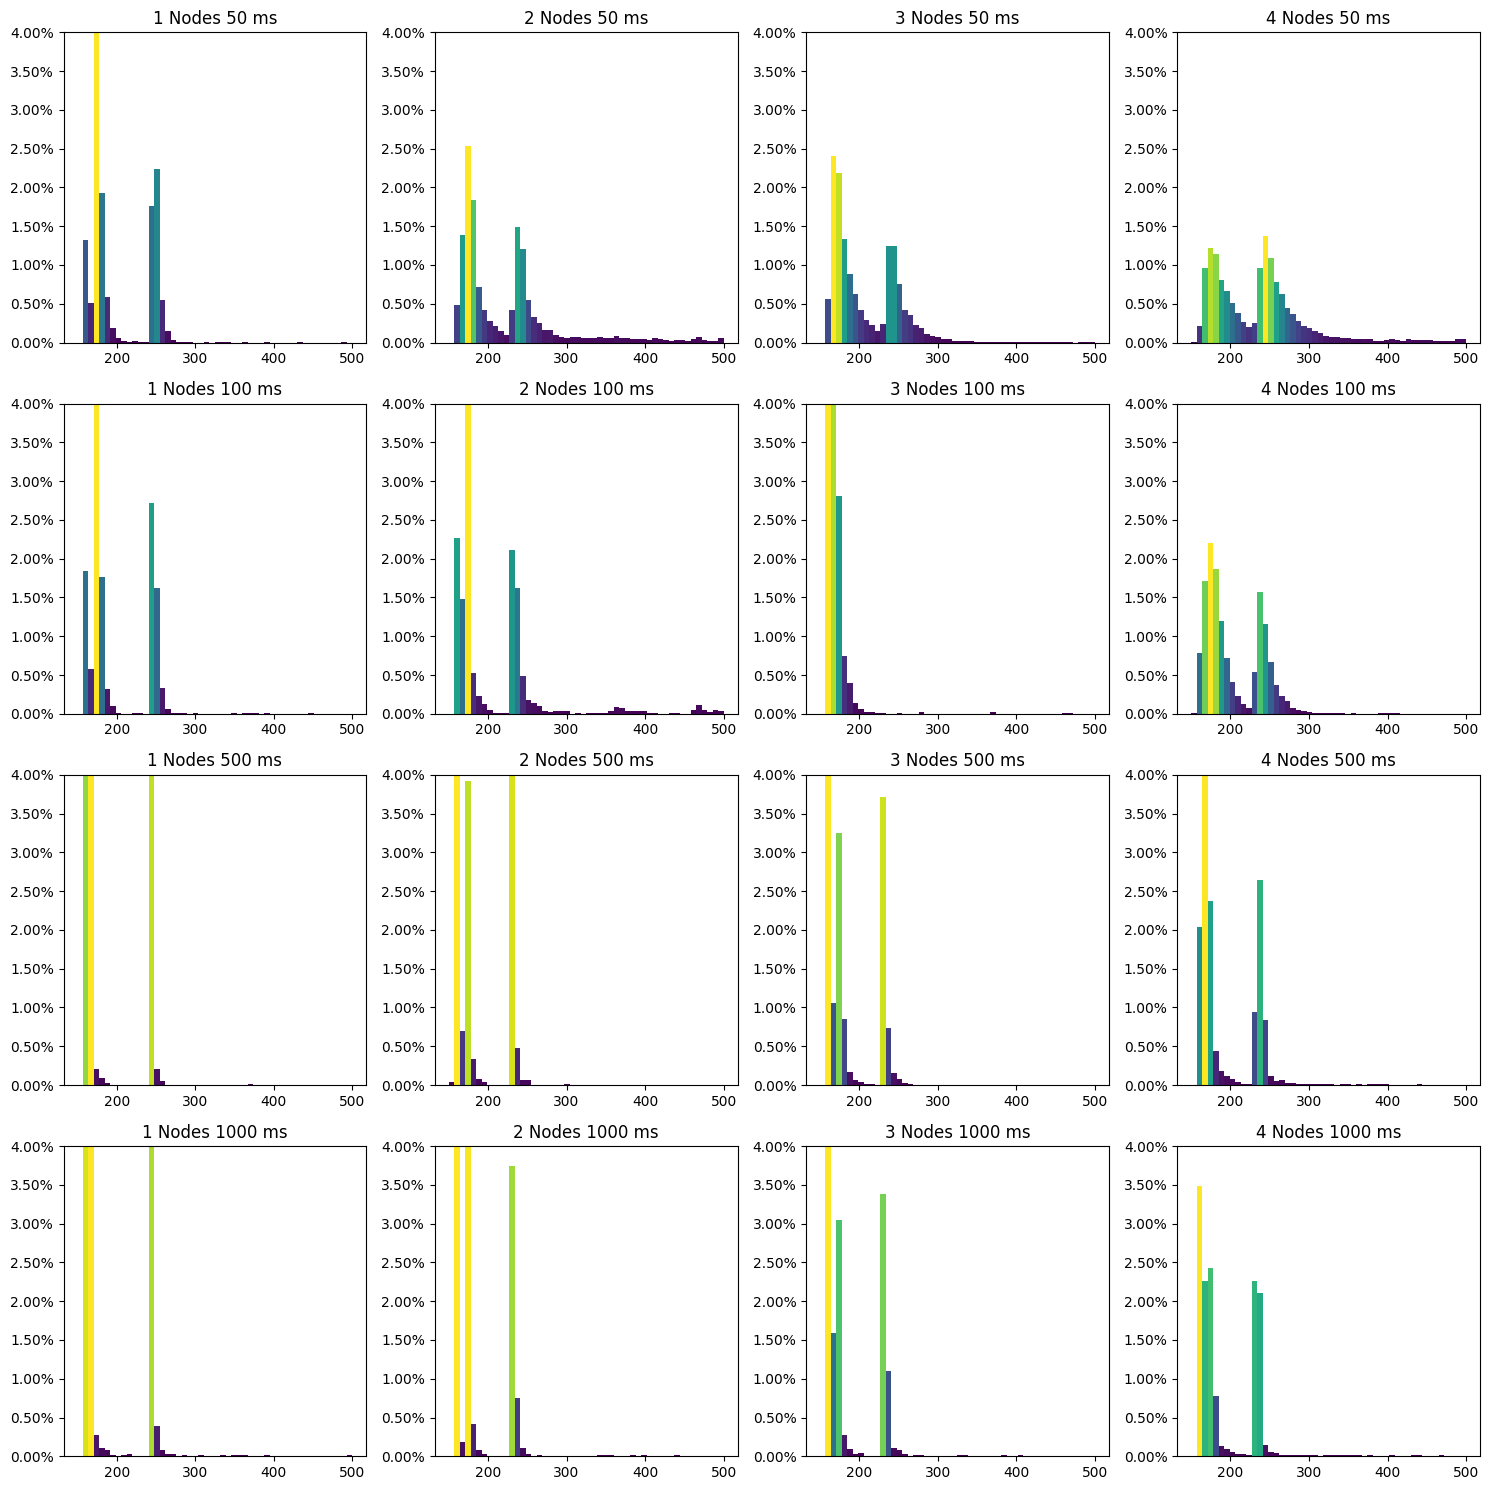

In [3]:

# Draw distribution figures
fig, axs = plt.subplots(len(freqs), len(node_cnts), tight_layout=True, figsize=(15, 15))
for (i, arr_per_freq) in enumerate(int_arrs):
  for (j, delays) in enumerate(arr_per_freq):
    ax = axs[i, j]
    ax.set_ylim(0, 0.04)
    N, bins, patches = ax.hist(delays, bins=50, range=(150, 500), density=True)
    ax.yaxis.set_major_formatter(PercentFormatter(xmax=1))
    ax.set_title(f'{node_cnts[j]} Nodes {freqs[i]} ms')
    fracs = N / N.max()
    norm = colors.Normalize(fracs.min(), fracs.max())
    for thisfrac, thispatch in zip(fracs, patches):
        color = plt.cm.viridis(norm(thisfrac))
        thispatch.set_facecolor(color)

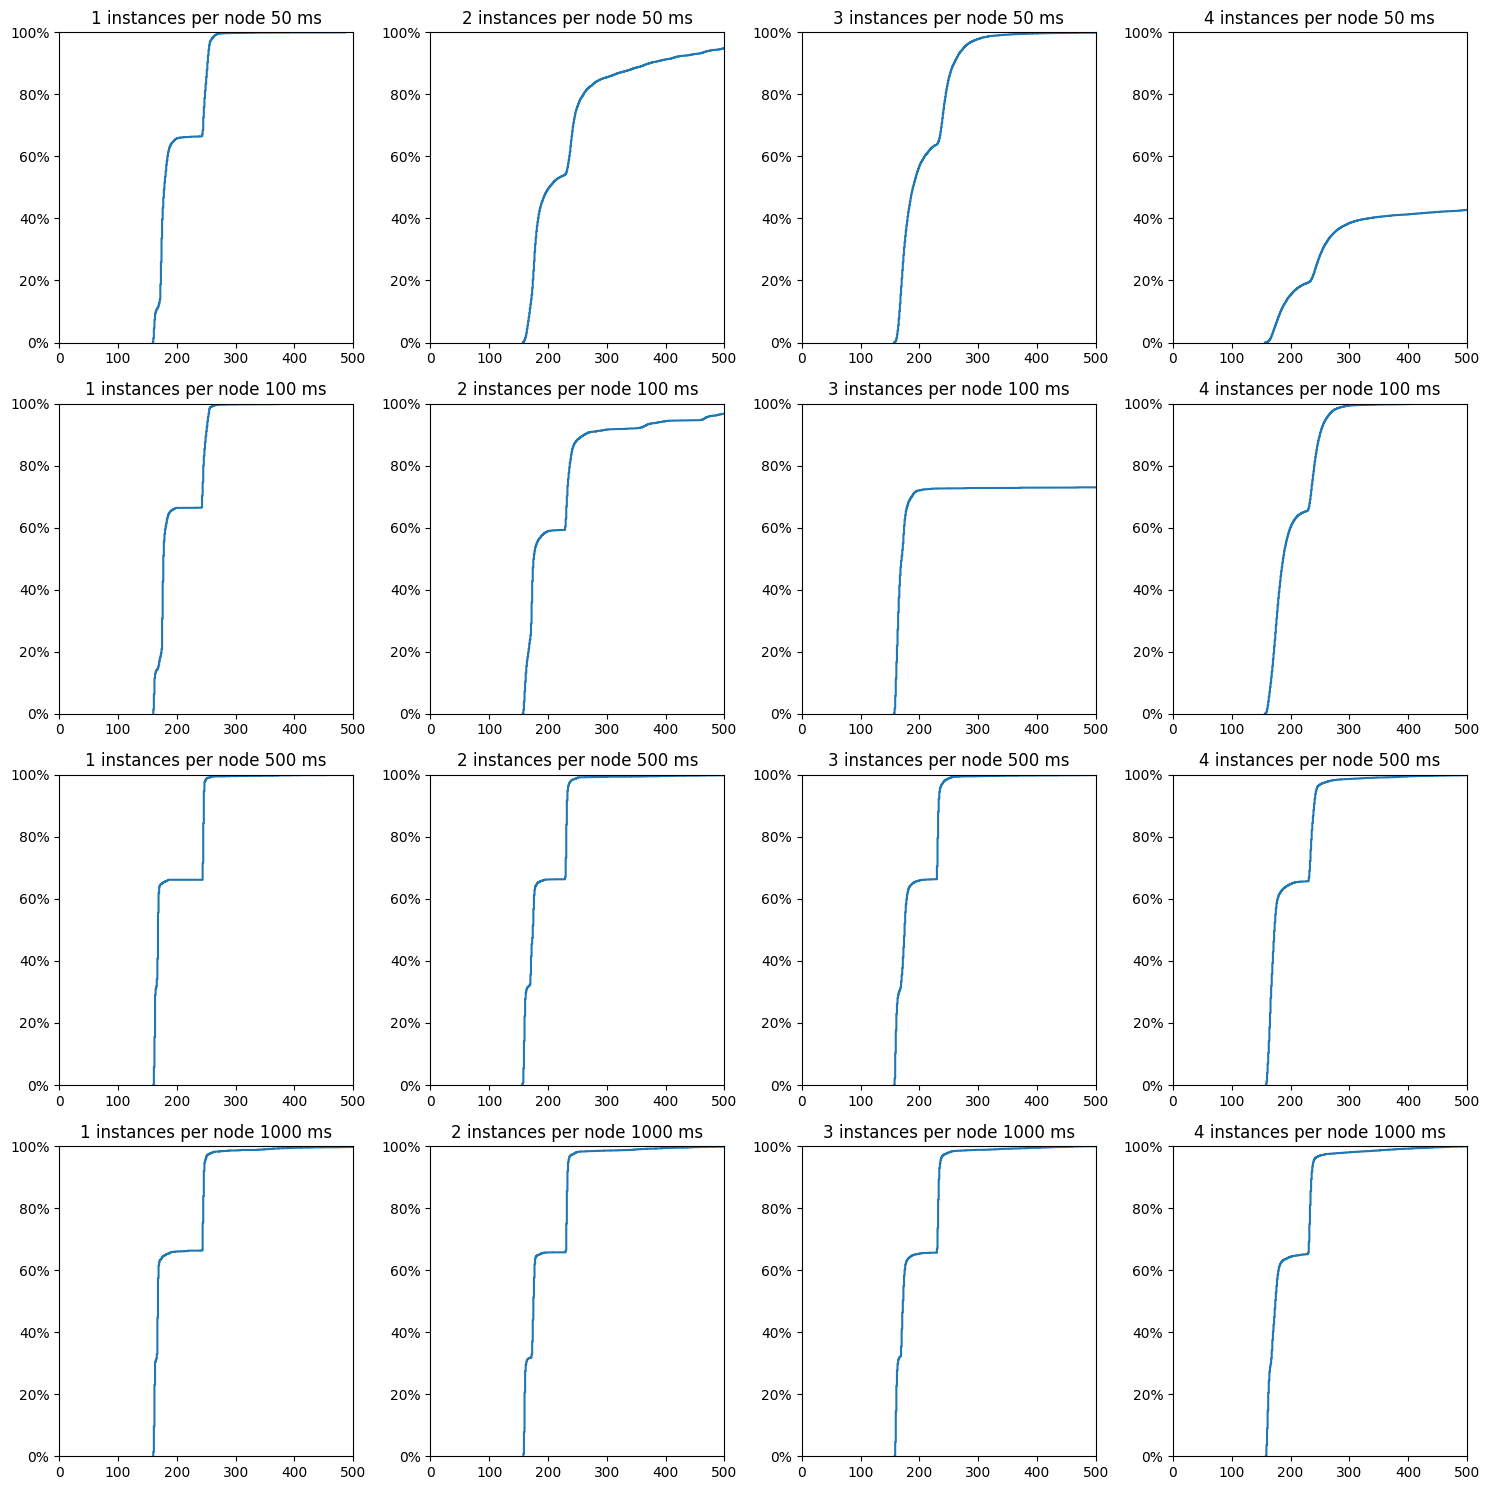

In [4]:
# Draw CDF
fig, axs = plt.subplots(len(freqs), len(node_cnts), tight_layout=True, figsize=(15, 15))
for (i, arr_per_freq) in enumerate(int_arrs):
  for (j, delays) in enumerate(arr_per_freq):
    ax = axs[i, j]
    ax.set_ylim(0, 1)
    ax.set_xlim(0, 500)
    ax.ecdf(delays)
    ax.yaxis.set_major_formatter(PercentFormatter(xmax=1))
    ax.set_title(f'{node_cnts[j]} instances per node {freqs[i]} ms')

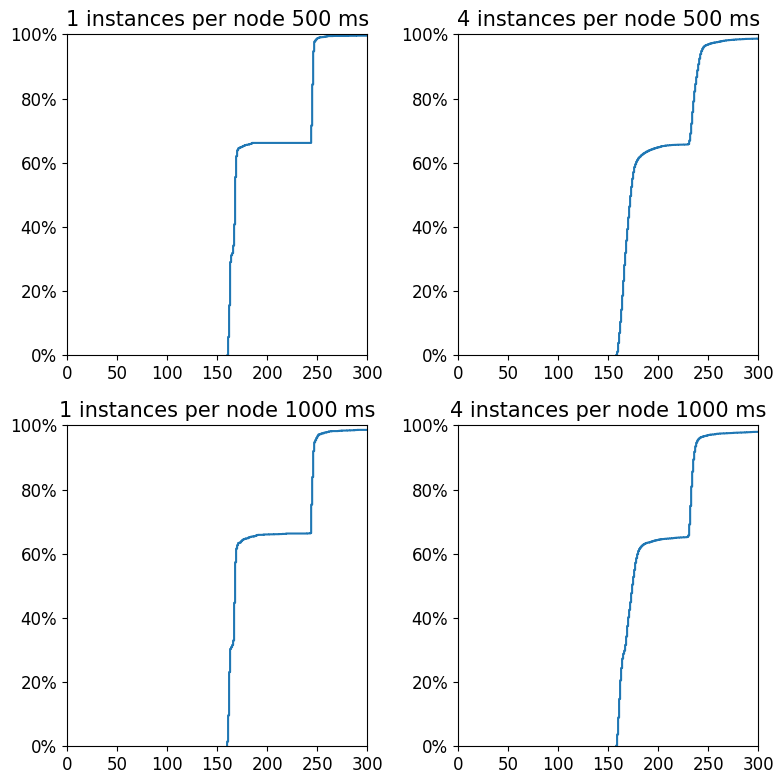

In [5]:
plt.rcParams.update({'font.size': 12})
fig, axs = plt.subplots(2, 2, tight_layout=True, figsize=(8, 8))
for i in range(2):
  for j in range(2):
    ax = axs[i, j]
    ax.set_ylim(0, 1)
    ax.set_xlim(0, 300)
    ax.ecdf(int_arrs[[2, 3][i]][[0, 3][j]])
    ax.yaxis.set_major_formatter(PercentFormatter(xmax=1))
    ax.set_title(f'{node_cnts[[0, 3][j]]} instances per node {freqs[[2, 3][i]]} ms', fontsize=15)

fig.savefig('figures/udp/dist.pdf', format='pdf', bbox_inches='tight')

In [6]:
def kick_outliners(data):
  mu = np.mean(data)
  sigma = np.std(data)
  return np.array([x for x in data if (mu - 3 * sigma < x < mu + 3 * sigma)], dtype=int)


filtered_data = [[kick_outliners(y) for y in x] for x in int_arrs]

means = [[np.mean(y) for y in x] for x in filtered_data]
np.array(means)

array([[ 200.15090795,  227.32112676,  205.54776214, 2148.08477491],
       [ 198.59505513,  204.97719025, 2637.32051061,  202.29660874],
       [ 192.54997909,  188.96730245,  190.17357911,  192.62300792],
       [ 192.31772152,  189.95542881,  189.66432288,  191.54901337]])

In [7]:
medians = [[np.median(y) for y in x] for x in filtered_data]
np.array(medians)

array([[ 179. ,  196. ,  189. , 1112.5],
       [ 177. ,  175. ,  169. ,  187. ],
       [ 168. ,  174. ,  175. ,  172. ],
       [ 168. ,  175. ,  172. ,  174. ]])